**importing data**

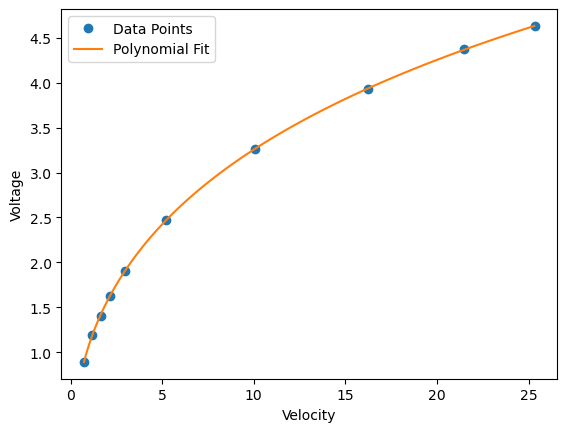

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calibration_data = pd.read_csv('calibration_data.csv')
U = calibration_data['Velocity'].values
V = calibration_data['Voltage'].values

coefficients = np.polyfit(V, U, 4)

# Generate voltage values for plotting
voltage_values = np.linspace(min(V), max(V), 100)
velocity_values = np.polyval(coefficients, voltage_values)

plt.plot(U, V, 'o', label='Data Points')
plt.plot(velocity_values, voltage_values, label='Polynomial Fit')
plt.xlabel('Velocity')
plt.ylabel('Voltage')
plt.legend()
plt.show()
